In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
pd.set_option("display.max_row", 110)
pd.set_option("display.max_column", 110)

In [4]:
url = 'https://raw.githubusercontent.com/MachineLearnia/Python-Machine-Learning/master/Dataset/dataset.csv'
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")

In [5]:
data.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df = data.copy()

# 2. Pre-processing #

## Objectifs : ##

- Mettre les données dans un format propice au ML
    - Train / Test
    - Encodage
    - Nettoyage des NaN

1er modèle : évaluation - diagnostic


- Améliorer la performance du modèle
    - Feature Selection
    - Feature Engineering
    - Feature Scaling
    - Suppression des Outliers
    
    


# 3. Modelling #

Objectif: développer un modèle de machine learning capable de répondre a l'objectif final.

	§ Définir une fonction d'évaluation
	§ Entrainement de différents modèles
	§ Optimisation avec GridSearchCV
	§ Analyse des erreurs et retour au Preprocessing / EDA
           Learning Curve et prise de décision

### Création des sous-ensembles (suite au EDA) ###

In [7]:
missing_rate = df.isna().sum()/df.shape[0]

In [8]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)])

In [9]:
key_columns = ["Patient age quantile", "SARS-Cov-2 exam result"]

In [10]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
a46b4402a0e5696,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


### TrainTest - Nettoyage - Encodage ###

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [13]:
trainset["SARS-Cov-2 exam result"].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [14]:
testset["SARS-Cov-2 exam result"].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

### Encodage ###

In [15]:
def encodage(df):
    code = {"positive":1,
           "negative":0,
           "detected":1,
           "not_detected":0}
   
    for col in df.select_dtypes("object").columns:
        df.loc[:,col] = df[col].map(code)
    
    return df

In [16]:
df.dtypes.value_counts()

object     20
float64    14
int64       1
dtype: int64

In [17]:
def feature_engineering(df):
    df["est malade"] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

In [18]:
def imputation(df):
    #df["is na"] = (df["Parainfluenza 3"].isna()) | (df["Leukocytes"].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return df

In [19]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop("SARS-Cov-2 exam result", axis=1)
    y = df["SARS-Cov-2 exam result"]
    
    print(y.value_counts())
    
    return X, y

In [20]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


D:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Modélisation ###

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [32]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False),
                             SelectKBest(f_classif, k=10))

In [33]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [37]:
list_of_models = {"RandomForest" : RandomForest, 
                  "AdaBoost" : AdaBoost, 
                  "SVM" : SVM, 
                  "KNN" : KNN}

RandomForest
[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111

AdaBoost
[[90  5]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        95
           1       0.55      0.38      0.44        16

    accuracy                           0.86       111
   macro avg       0.72      0.66      0.68       111
weighted avg       0.85      0.86      0.85       111

SVM
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73  

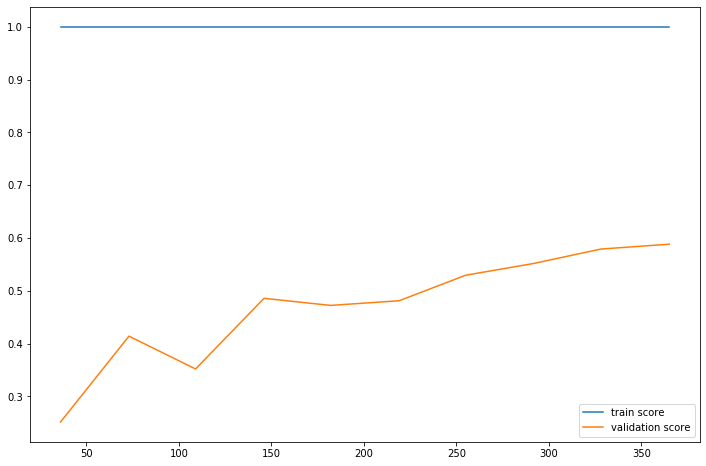

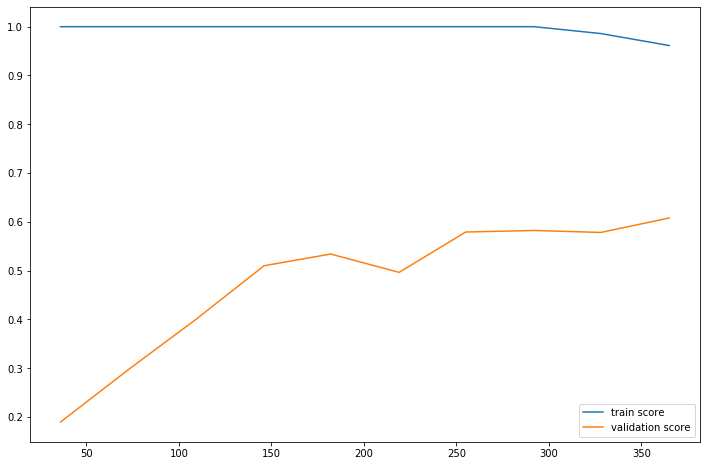

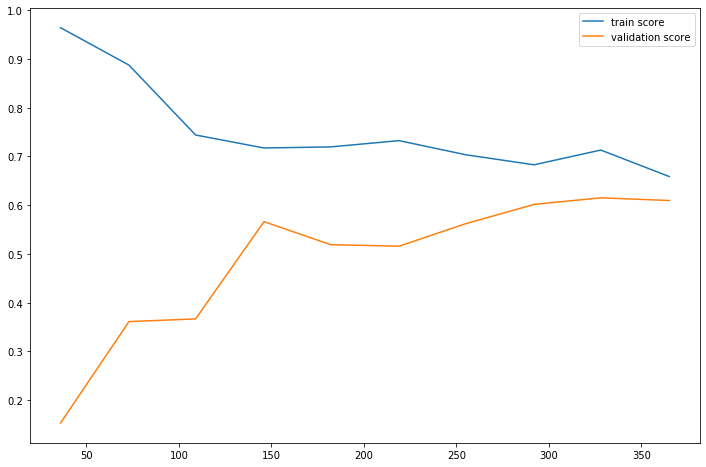

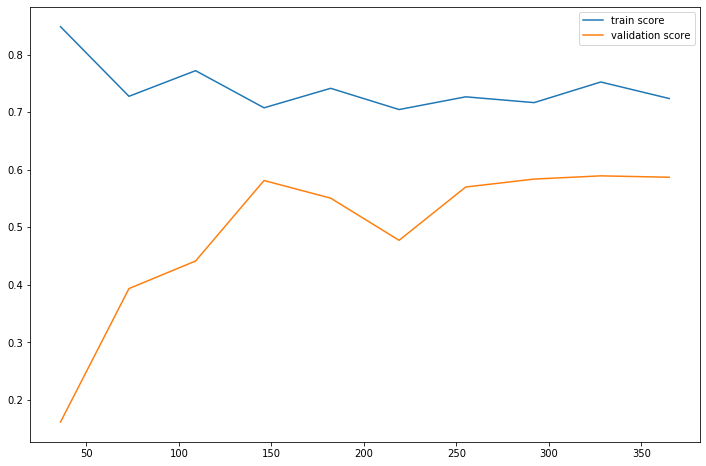

In [39]:
for name, model in list_of_models.items():
    print(name)
    evaluation(model)

### Procédure d'évaluation ###

In [28]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [29]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               cv=4, scoring="f1", 
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label="train score")
    plt.plot(N, val_score.mean(axis=1), label="validation score")
    plt.legend()

[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



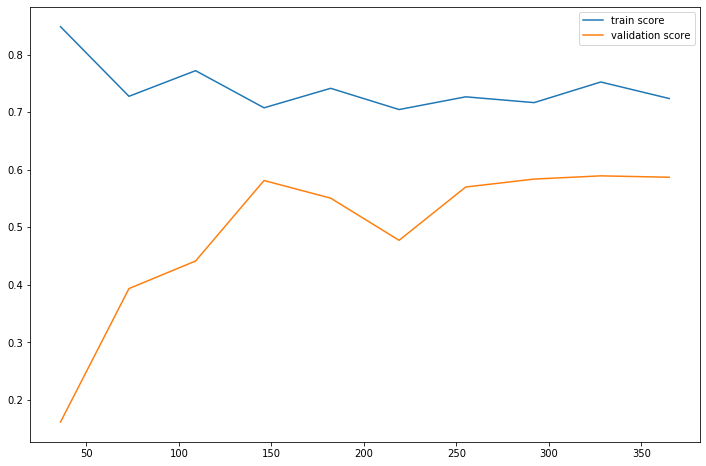

In [40]:
evaluation(model)

In [178]:
#pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

### Optimisation ###

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [42]:
SVM

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x0000021CDC987C18>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', ke

In [52]:
hyper_params = {"svc__gamma" : [1e-3, 1e-4],
                "svc__C" : [1, 10, 100, 1000],
                "pipeline__polynomialfeatures__degree" : [2, 3, 4],
                "pipeline__selectkbest__k" : range(40, 60)}

In [53]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring="recall", 
                          cv=4, n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 52, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.67      0.62      0.65        16

    accuracy                           0.90       111
   macro avg       0.80      0.79      0.79       111
weighted avg       0.90      0.90      0.90       111



[[90  5]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.67      0.62      0.65        16

    accuracy                           0.90       111
   macro avg       0.80      0.79      0.79       111
weighted avg       0.90      0.90      0.90       111



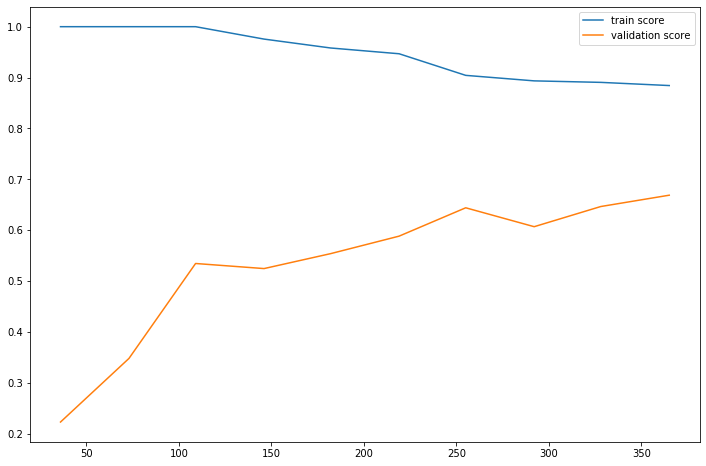

In [54]:
evaluation(grid.best_estimator_)

### Precision Recall Curve ###

In [55]:
from sklearn.metrics import precision_recall_curve

In [57]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

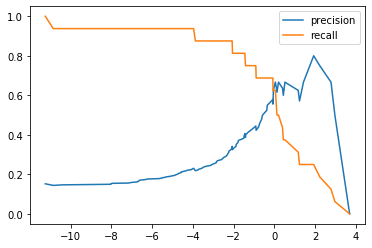

In [58]:
plt.plot(threshold, precision[:-1], label="precision")
plt.plot(threshold, recall[:-1], label="recall")
plt.legend()

In [59]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [60]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [62]:
from sklearn.metrics import recall_score

In [61]:
f1_score(y_test, y_pred)

0.5581395348837209

In [63]:
recall_score(y_test, y_pred)

0.75